In [1]:
# to install
# conda install -c omnia autograd

import autograd.numpy as np

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Let's make some fake data. First some $x$ values:

In [3]:
np.random.seed(10)
x = 2 * np.random.randn(100)
x.sort()

Let's use this to create a design matrix, $D$. The columns of $D$ will be our features,

$$
\begin{align*}
d_0 &= 1   \\
d_1 &= x   \\
d_2 &= \sin(x+1)  
\end{align*}
$$

In [4]:
D = np.vstack([np.ones_like(x),x,np.sin(x+1)]).T

Here are the first few rows:

In [5]:
D[:5,:]

array([[ 1.        , -4.26342422,  0.1215304 ],
       [ 1.        , -3.98878754, -0.15221116],
       [ 1.        , -3.95545656, -0.18506312],
       [ 1.        , -3.90902424, -0.23047755],
       [ 1.        , -3.71237096, -0.41616322]])

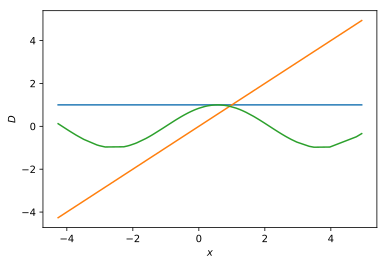

In [6]:
plt.plot(x,D);
plt.xlabel('$x$');
plt.ylabel('$D$');

Now let's take a linear combination of the features in $D$, and add some noise.   

For features $\beta$ and noise $\varepsilon \sim \text{Normal}(0,2)$, this gives us

$$
\begin{align*}
y &= D\beta + \varepsilon \\
  &= d_0 \beta_0  + d_1 \beta_1 + d_2 \beta_2  + \varepsilon \\
\varepsilon &\sim \text{Normal}(0,2)
\end{align*}
$$

In [7]:
β = np.array([-3,-3.2,5.5])

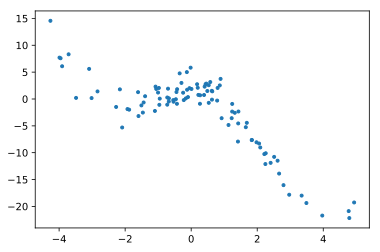

In [8]:
# add some noise to the function and plot

np.random.seed(1)
y = D.dot(β) + 2 * np.random.randn(100) 
plt.plot(x,y,'.');

The goal of this exercise is to guess the $\beta$ coefficients (pretend you don't know them from above) for this distribution of points.  The goal will be to minimize the sum of squares.

In [9]:
def sumofsquares(β):
    residuals = y - D.dot(β)
    return residuals.dot(residuals)

sumofsquares([1,2,3])

11747.415937871472

In [10]:
from autograd import grad

def justanexample(x):
    return x[0]+3*x[1]

grad(justanexample)(np.array([2.0,5.0]))

array([1., 3.])

**Note** input values must be floating point (not integers)

# Exercise

1. Use `grad` to minimize `sumofsquares` to determine the best beta to fit the data.
1. Add a ridge penalty. How does this change the result?